## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(\omega, x)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


Punto #1

Las ecuaciones de movimiento son:
$$\ddot{x}=(l_0+x)-\frac{k}{m}x+gcos(\theta)$$\
$$\ddot{\theta}=-sen(\theta)\frac{g}{l_0+x}-\frac{2\dot{x}}{l_0+x}\dot{\theta}$$\
$$w=\dot{\theta}, v=\dot{x}$$\
\begin{equation} 
	U=\begin{bmatrix} 
		v  \\ 
		w  \\ 
		x  \\
    \theta   
	\end{bmatrix} = \begin{bmatrix} 
		U_0  \\ 
		U_1  \\ 
		U_2  \\
    U_3   
	\end{bmatrix}
\end{equation}


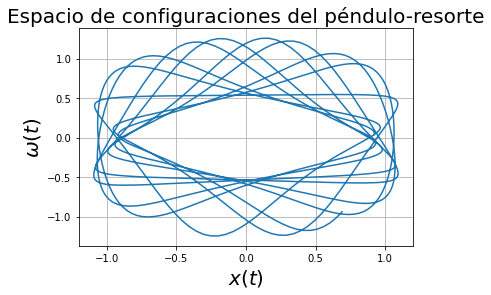

In [2]:
#Función derivada
def du_dt(u0,t,L,k=1,m=0.2,g=9.8):
    x,θ,v,ω = u0
    dudt = [v, ω, (L+x)*ω**2 - k/m*x + g*np.cos(θ), -(g*np.sin(θ) + 2*v*ω)/(L + x)]
    return dudt

#Definición de parametros

n = 1000   
k = 1          
m = 0.2           
g = 9.8 
Lp = np.random.uniform(0,1,n)
θp = np.random.uniform(-np.pi/2,np.pi/2,n)
vp = np.random.uniform(-1,1,n)
ωp = np.random.uniform(-1,1,n)         

t = np.linspace(0,30,n)
for L,θ,v,ω in zip(Lp,θp,vp,ωp):
    u0 = [L,θ,v,ω]
    u = odeint(du_dt,u0,t,args=(L,k,m,g))

# coordenadas x del movimiento
x = L*np.sin(u[:,1])+u[:,0]*np.sin(u[:,1])
# coordenadas w 
w = u[:,3]

plt.plot(x,w)
plt.title('Espacio de configuraciones del péndulo-resorte', size=20)
plt.xlabel('$x(t)$',size=20)
plt.ylabel('$ω(t)$',size=20)
plt.grid()


Punto #2



In [3]:
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')
df


,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


Text(0.5, 1.0, 'Decaimiento radioactivo DATAFRAME')

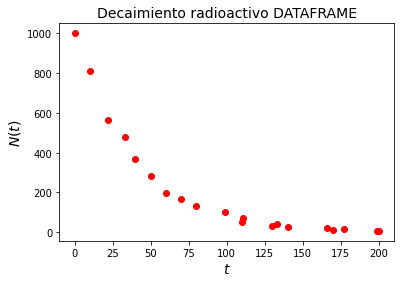

In [4]:
t_1=df['t']
N_t = df['N(t)']
plt.plot(t_1,N_t,'ro')
plt.xlabel('$t$', size=14)
plt.ylabel('$N(t)$', size=14)
plt.title('Decaimiento radioactivo DATAFRAME', size=14)

In [5]:
#(a) Realice un fit a los datos y determine la vida media con su respectivo error.

# Definiendo la función 
def model_func(t, N_0, 𝜆, b):
    return N_0 * np.exp(-𝜆*t) + b

# data
t = t_1
y = N_t 
# curve fit
p0 = (1000,1.e-5,1.) # starting search koefs
popt, pcov = curve_fit(model_func, t, y, p0)
N_0, 𝜆, b = popt

In [6]:

perr = np.sqrt(np.diag(pcov))
error=perr[1] 
popt[1]=𝜆
𝜏 = np.log(2)/𝜆
print('valor vida media',𝜏, 'años')
print('error del fit al calular vida media', error)

valor vida media 27.64350639074006 años
error del fit al calular vida media 0.0006867915384744743


In [7]:
popt[1]=𝜆
𝜏 = np.log(2)/𝜆
print('valor vida media',𝜏, 'años')

valor vida media 27.64350639074006 años


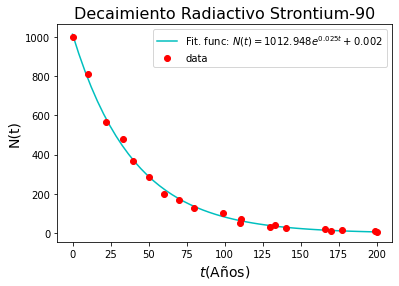

In [8]:
#(b) Grafique los datos como puntos en el plano  𝑡 ,  𝑁(𝑡)  y el correspondiente al fit

t2 = np.linspace(0, 200)
y2 = model_func(t2, N_0, 𝜆, b)

fig, ax = plt.subplots()
ax.plot(t2, y2, color='c', label='Fit. func: $N(t) = %.3f e^{%.3f t} %+.3f$' % (N_0,𝜆,b))
ax.plot(t, y, 'ro', label='data')
ax.legend(loc='best')
plt.xlabel('$t$(Años)', fontsize=14)
plt.ylabel('N(t)', fontsize=14)
plt.title( "Decaimiento Radiactivo Strontium-90", fontsize=16 )
plt.show()